# Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
sns.set()

# Loading the raw data

In [2]:
raw_data=pd.read_csv('1.04. Real-life example.csv')
raw_data.head(7)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.5,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.0,Gas,yes,1997,320


# Preprocessing

# Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


# Determining the variables of interest

In [4]:
data=raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
data_no_mv=data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Exploring the PDFs

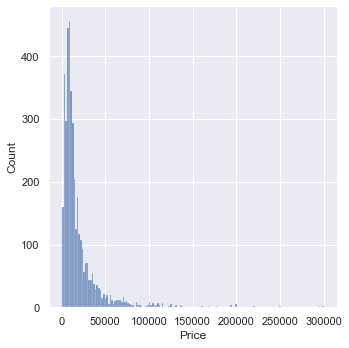

In [8]:
sns.displot(data_no_mv['Price'])

# Dealing with outliers

In [9]:
q = data_no_mv['Price'].quantile(0.99)
data_1=data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


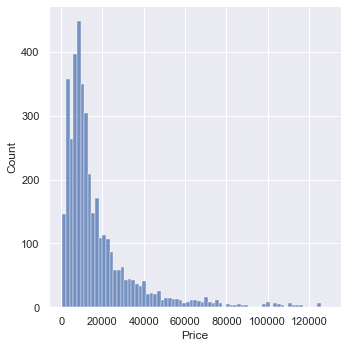

In [10]:
sns.displot(data_1['Price'])

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

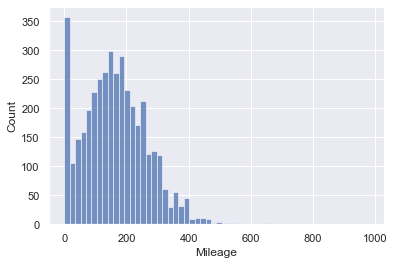

In [11]:
sns.histplot(data_no_mv['Mileage'])

In [12]:
q = data_no_mv['Price'].quantile(0.99)
data_2=data_no_mv[data_no_mv['Price']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

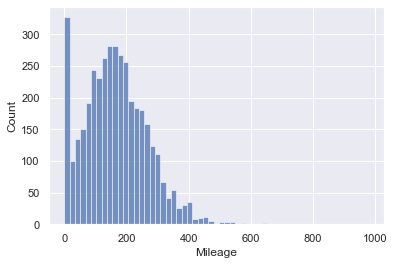

In [13]:
sns.histplot(data_2['Mileage'])

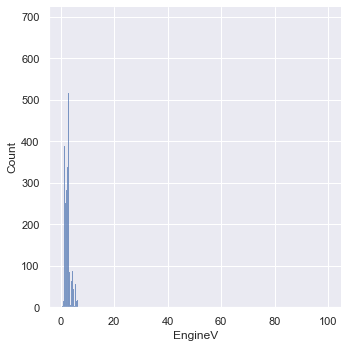

In [14]:
sns.displot(data_no_mv['EngineV'])

In [15]:
data_3=data_2[data_2['EngineV']<6.5]

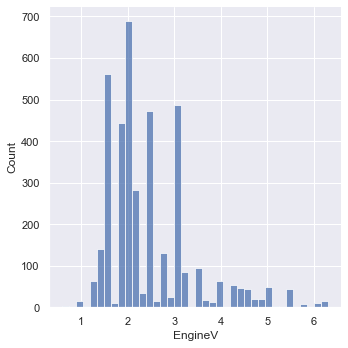

In [16]:
sns.displot(data_3['EngineV'])

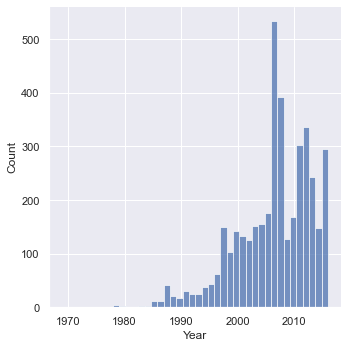

In [17]:
sns.displot(data_no_mv['Year'])

In [18]:
q = data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]

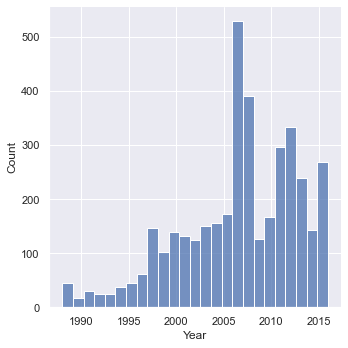

In [19]:
sns.displot(data_4['Year'])

In [20]:
data_cleaned=data_4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3905,3905.000000,3905,3905.000000,3905.000000,3905,3905,3905.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,861,NaN,1482,NaN,NaN,1835,3540,NaN
mean,NaN,18100.297083,NaN,164.107298,2.449795,NaN,NaN,2006.620487
std,NaN,19056.178291,NaN,102.377608,0.947793,NaN,NaN,6.173623
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7150.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,159.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS assumptions

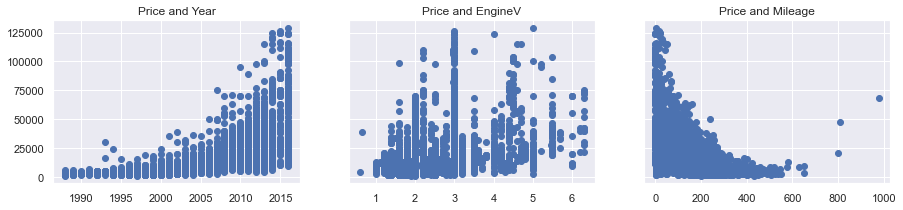

In [22]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

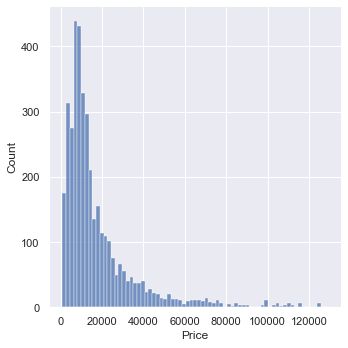

In [23]:
sns.displot(data_cleaned['Price'])

# Relaxing the assumptions

In [24]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3900,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3901,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3902,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3903,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


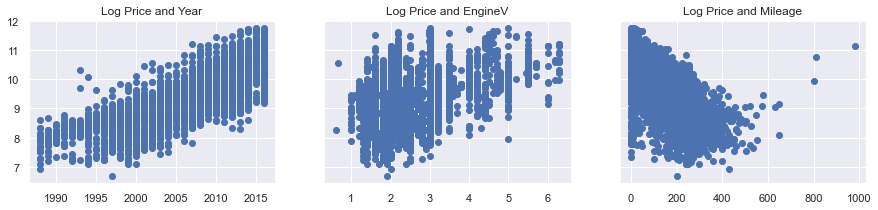

In [25]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()

In [26]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

# Multicollinearity

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [29]:
vif

,VIF,features
0,3.546054,Mileage
1,10.140993,Year
2,7.680951,EngineV


In [30]:
data_no_multicollinearity=data_cleaned.drop(['Year'],axis=1)

# Create dummy variables

In [31]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [32]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Rearrange a bit

In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols=[ 'log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']


In [35]:
data_preprocessed=data_with_dummies[cols]

In [36]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Linear regression model

# Declare the inputs and the targets

In [37]:
targets=data_preprocessed['log_price']
inputs=data_preprocessed.drop(['log_price'],axis=1)

# Scale the data

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [40]:
input_scaled=scaler.transform(inputs)

# Train Test Split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(input_scaled,targets,test_size=0.2,random_state=365)

# Create the regression

In [43]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [44]:
y_hat=reg.predict(x_train)

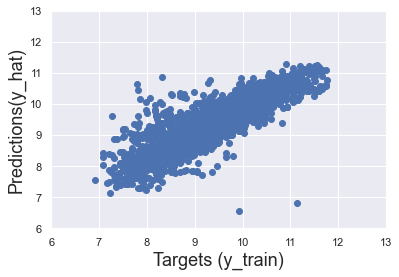

In [45]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

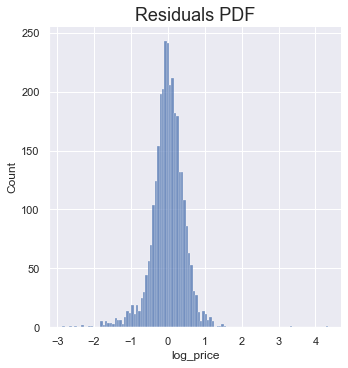

In [46]:
sns.displot(y_train - y_hat)
plt.title("Residuals PDF",size=18)

In [47]:
reg.score(x_train,y_train)

0.7339089649912188

# Finding the weights and bias

In [48]:
reg.intercept_

9.410666694192361

In [49]:
reg.coef_

array([-0.4468837 ,  0.21470701,  0.0148205 ,  0.01579986, -0.12422437,
       -0.18127181, -0.05160152, -0.08437286, -0.13575961, -0.10421816,
       -0.20328096, -0.12761365, -0.17649049, -0.14206839, -0.03360034,
       -0.15884723,  0.32366356])

In [50]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.446884
1,EngineV,0.214707
2,Brand_BMW,0.014820
3,Brand_Mercedes-Benz,0.015800
4,Brand_Mitsubishi,-0.124224
5,Brand_Renault,-0.181272
6,Brand_Toyota,-0.051602
7,Brand_Volkswagen,-0.084373
8,Body_hatch,-0.135760
9,Body_other,-0.104218


In [51]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

# Testing

In [52]:
y_hat_test=reg.predict(x_test)

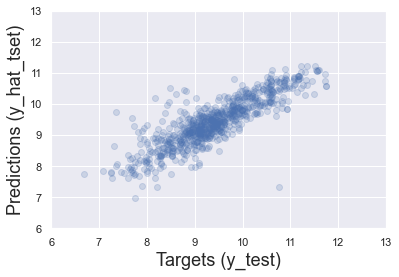

In [53]:
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_tset)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [54]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_pf.head()

,Prediction
0,4947.898561
1,3382.870468
2,52733.700690
3,36283.210380
4,7054.096593


In [55]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,4947.898561,NaN
1,3382.870468,7900.0
2,52733.700690,NaN
3,36283.210380,NaN
4,7054.096593,NaN
...,...,...
776,11023.101982,NaN
777,10184.873706,NaN
778,66843.120543,NaN
779,32440.836282,NaN


In [56]:
y_test

1258     9.011889
167      7.762171
1615    10.505068
1825    10.257659
921      8.748305
          ...    
1201     8.961879
3778     9.928180
2635    10.887437
211     10.515967
2209     7.346010
Name: log_price, Length: 781, dtype: float64

In [57]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0     9.011889
1     7.762171
2    10.505068
3    10.257659
4     8.748305
Name: log_price, dtype: float64

In [58]:
df_pf['Target']=np.exp(y_test)
df_pf

,Prediction,Target
0,4947.898561,8200.0
1,3382.870468,2350.0
2,52733.700690,36500.0
3,36283.210380,28500.0
4,7054.096593,6300.0
...,...,...
776,11023.101982,7800.0
777,10184.873706,20500.0
778,66843.120543,53500.0
779,32440.836282,36900.0


In [59]:
df_pf['Residual']=df_pf['Target']-df_pf['Prediction']

In [60]:
df_pf['Difference%']=np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,4947.898561,8200.0,3252.101439,39.659774
1,3382.870468,2350.0,-1032.870468,43.951935
2,52733.700690,36500.0,-16233.700690,44.475892
3,36283.210380,28500.0,-7783.210380,27.309510
4,7054.096593,6300.0,-754.096593,11.969787
...,...,...,...,...
776,11023.101982,7800.0,-3223.101982,41.321820
777,10184.873706,20500.0,10315.126294,50.317689
778,66843.120543,53500.0,-13343.120543,24.940412
779,32440.836282,36900.0,4459.163718,12.084455


In [61]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,781.000000,781.000000,781.000000,781.000000
mean,16422.126623,18367.707926,1945.581302,39.339711
std,13273.940792,19582.214657,10959.518054,69.519517
min,1049.242283,800.000000,-31382.596771,0.026334
25%,7554.605164,6999.000000,-2304.516841,12.037145
50%,11987.372567,11500.000000,50.262179,24.357382
75%,20376.154840,21500.000000,3148.244025,42.666446
max,74726.140970,125000.000000,85722.102686,1001.292994


In [62]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x:'%.2f'%x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
259,17504.61,17500.00,-4.61,0.03
33,14889.15,14900.00,10.85,0.07
223,43798.95,43900.00,101.05,0.23
630,23943.85,24000.00,56.15,0.23
385,19752.29,19800.00,47.71,0.24
24,8975.19,8999.00,23.81,0.26
26,40119.31,39999.00,-120.31,0.30
370,12703.16,12650.00,-53.16,0.42
377,6028.19,6000.00,-28.19,0.47
135,19802.80,19900.00,97.20,0.49


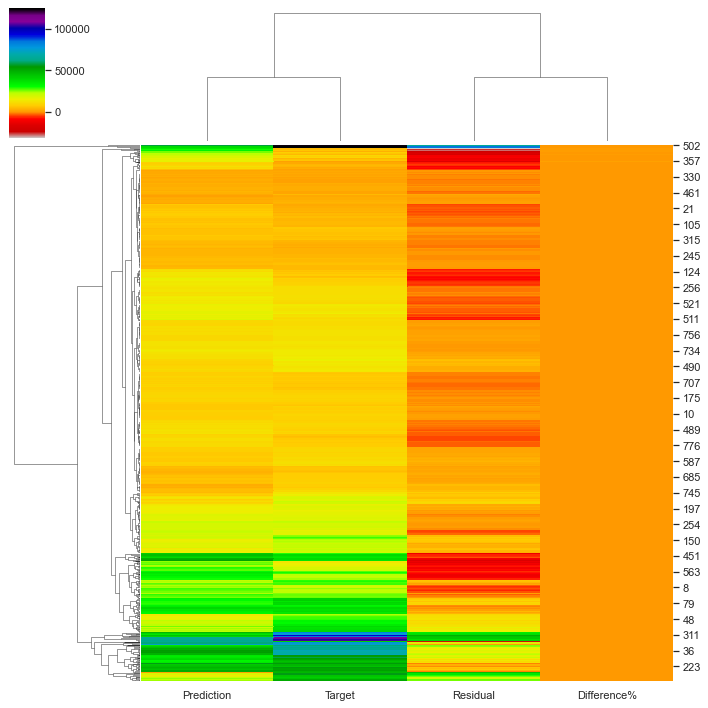

In [64]:
sns.clustermap(df_pf,cmap='nipy_spectral_r')